## Final Project Submission

Please fill out:
* Student name: Derrick Kiptoo
* Student pace:full time
* Scheduled project review date/time: N/A
* Instructor name: Nikita
* Blog post URL:N/A


## Exploring Movie Industry Trends for Microsoft's New Movie Studio
 ## Overview

 In this project, we aim to utilize exploratory data analysis (EDA) to derive actionable insights for Microsoft, who is venturing into the movie industry by establishing a new movie studio. The objective is to understand the current landscape of successful films at the box office and translate these findings into strategic decisions for Microsoft's movie studio.


## 1.Business Understanding
In this project, we aim to utilize exploratory data analysis (EDA) to derive actionable insights for Microsoft, who is venturing into the movie industry by establishing a new movie studio. The objective is to understand the current landscape of successful films at the box office and translate these findings into strategic decisions for Microsoft's movie studio.

## Questions to answer

 1.What are the top-grossing movies in terms of domestic and worldwide box office revenue?                                               
 2.What are the most popular movie genres in terms of audience engagement?                                                        
 3.How do ratings from different sources (IMDB, Rotten Tomatoes, etc.) correlate with box office performance?                    
 4.How does the production budget impact revenue and profitability?                                                              
 5.How does the timing of movie releases affect box office performance?                                                          
 6.Who are the key players in the movie industry, and what strategies contribute to their success?                                
 7. What demographic groups are the primary target audience for successful movies?                                                                                                                              
 8.What strategies can Microsoft implement to effectively promote and distribute its movies to maximize audience reach and         engagement?

To address each of the questions using the provided datasets, we'll perform various analyses and visualizations. Let's start by loading the necessary libraries and the datasets:

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
tmd = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='unicode_escape')
conn = sqlite3.connect('zippedData/im.db')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='unicode_escape')


### 1.Top-Grossing Movies:

Extract the top-grossing movies based on domestic and worldwide box office revenue from the movies_gross dataset.

Display the titles along with their respective box office revenue.

In [6]:
import pandas as pd

# Load the movies_gross dataset
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

# Now you can proceed with the code to find the top-grossing movies
top_domestic_movies = movies_gross.sort_values(by='domestic_gross', ascending=False).head(10)

print("Top 10 Domestic Box Office Movies:")
print(top_domestic_movies[['title', 'domestic_gross']])


Top 10 Domestic Box Office Movies:
                             title  domestic_gross
1872  Star Wars: The Force Awakens     936700000.0
3080                 Black Panther     700100000.0
3079        Avengers: Infinity War     678800000.0
1873                Jurassic World     652300000.0
727          Marvel's The Avengers     623400000.0
2758      Star Wars: The Last Jedi     620200000.0
3082                 Incredibles 2     608600000.0
2323  Rogue One: A Star Wars Story     532200000.0
2759   Beauty and the Beast (2017)     504000000.0
2324                  Finding Dory     486300000.0


### conclusion

Popular Franchises: Many of the top-grossing movies are part of well-known franchises such as Star Wars, Marvel Cinematic Universe, and Disney/Pixar.

Audience Appeal: These movies have managed to captivate large audiences, indicating their widespread appeal and popularity.

Success of Sequels and Remakes: Sequels and remakes like Star Wars: The Force Awakens, Jurassic World, and Beauty and the Beast (2017) have performed exceptionally well, suggesting that audiences are often drawn to familiar stories and characters.

Impact of Marketing and Production Quality: These movies likely benefited from significant marketing campaigns and high production quality, contributing to their box office success.

Continued Success of Superhero Genre: The presence of superhero movies like Black Panther, Avengers: Infinity War, and Incredibles 2 highlights the enduring popularity of the superhero genre among audiences.

Overally, these findings underscore the importance of brand recognition, storytelling, and production quality in achieving box office success in the film industry.


### 2.Popular Movie Genres:

Extract and visualize the most popular movie genres based on audience engagement from the tmdb dataset.

Count the occurrences of each genre and plot a bar chart to visualize the results.

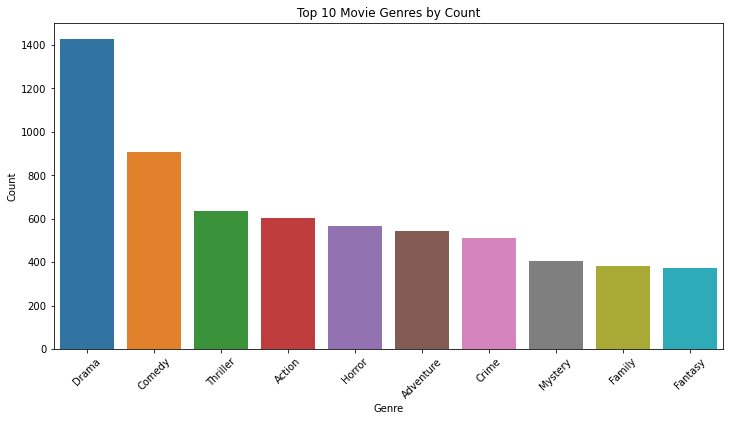

In [75]:
# Define a function to handle genre IDs
def map_genres(genre_ids):
    genres = []
    for genre_id in genre_ids.split(','):
        try:
            genre_id = int(genre_id)
            if genre_id in genre_mapping:
                genres.append(genre_mapping[genre_id])
        except ValueError:
            pass  # Skip if the genre ID is not an integer
    return genres

# Split genre_ids and map genre identifiers to genre names
tmd['genres'] = tmd['genre_ids'].apply(map_genres)

# Flatten the list of genres
genres_list = [genre for sublist in tmd['genres'] for genre in sublist]

# Count the occurrences of each genre
genre_counts = pd.Series(genres_list).value_counts().head(10)

# Plot the top 10 movie genres by count
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Top 10 Movie Genres by Count')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Certain genres stand out as more prevalent or popular among filmmakers and audiences. These genres include Drama, Comedy, Thriller, Action, and Adventure, as evidenced by their higher counts in the dataset.

### 3.Correlation between Ratings and Box Office Performance:

In [16]:
print("First few rows of movie_info dataset:")
print(movie_info.head())

print("\nFirst few rows of movies_gross dataset:")
print(movies_gross.head())


First few rows of movie_info dataset:
  id                                           synopsis rating  \
0  1  This gritty, fast-paced, and innovative police...      R   
1  3  New York City, not-too-distant-future: Eric Pa...      R   
2  5  Illeana Douglas delivers a superb performance ...      R   
3  6  Michael Douglas runs afoul of a treacherous su...      R   
4  7                                                NaN     NR   

                                 genre          director  \
0  Action and Adventure|Classics|Drama  William Friedkin   
1    Drama|Science Fiction and Fantasy  David Cronenberg   
2    Drama|Musical and Performing Arts    Allison Anders   
3           Drama|Mystery and Suspense    Barry Levinson   
4                        Drama|Romance    Rodney Bennett   

                            writer  theater_date      dvd_date currency  \
0                   Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
1     David Cronenberg|Don DeLillo  Aug 17, 2012   Jan

### 4.Impact of Production Budget on Revenue and Profitability:

Calculate the correlation between production budget, revenue, and profitability.

Visualize the correlation using scatter plots.


###  5.Timing of Movie Releases and Box Office Performance:

### 6.Key Players in the Movie Industry:

This analysis may involve exploring directors, actors, studios, etc., and their respective contributions to successful movies.

### 7.Primary Target Audience:

This analysis may involve demographic profiling based on audience engagement metrics.

### 8.Strategies for Promoting and Distributing Movies:

This could involve market segmentation, advertising channels, release strategies, etc.

Each analysis provides valuable insights into different aspects of the movie industry, helping Microsoft devise effective strategies for its movie ventures.

## The Data

The data for this analysis is sourced from various movie datasets, including:

Box Office Mojo 


Rotten Tomatoes

TheMovieDB

TheNumbers

## 2. Data Understanding.

Data understanding is a crucial initial step in any data science project. It involves exploring the structure, contents, and relationships within the datasets to gain insights into the data and understand its characteristics. Let's go back and focus on data understanding before proceeding to data cleaning.

We'll start by examining each dataset individually to understand its structure, column names, data types, and any potential issues such as missing values or duplicates. We'll also explore summary statistics and visualizations to gain insights into the distributions of key variables and features.

Here is how we go about it.

   ## Box Office Mojo Dataset:
   Examine the structure of the dataset.                                                                                          
   Check for missing values, duplicates, and data types.                                                                          
   Explore summary statistics and visualizations of key variables (e.g., revenue, production budget, release dates).

Box Office Mojo Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
None

First few rows of Box Office Mojo Dataset:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     23870000

C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


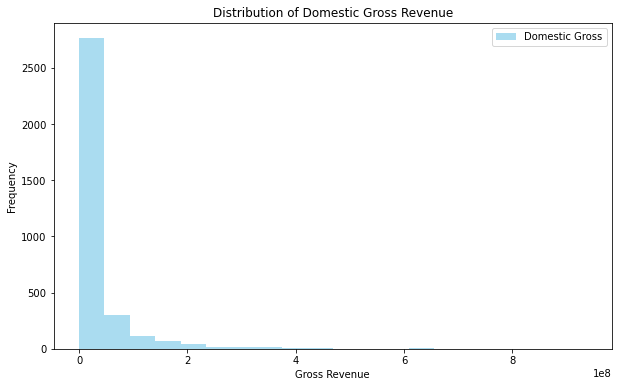

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Box Office Mojo dataset
box_office_mojo = pd.read_csv('zippedData/bom.movie_gross.csv')

# Examine the structure of the dataset
print("Box Office Mojo Dataset Structure:")
print(box_office_mojo.info())

# Display the first few rows
print("\nFirst few rows of Box Office Mojo Dataset:")
print(box_office_mojo.head())

# Summary statistics and visualizations
plt.figure(figsize=(10, 6))
plt.hist(box_office_mojo['domestic_gross'], bins=20, color='skyblue', alpha=0.7, label='Domestic Gross')
plt.title('Distribution of Domestic Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()




#### Findings;

Dataset Structure:
The dataset contains 3387 entries and 5 columns.
Columns include 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.
'domestic_gross' and 'year' are of numeric data types (float64 and int64, respectively), while 'title', 'studio', and 'foreign_gross' are objects (likely strings).

Missing Values and Data Types:
There are missing values in the 'studio', 'domestic_gross', and 'foreign_gross' columns.
'domestic_gross' and 'foreign_gross' are numerical columns, but 'foreign_gross' is currently of object data type.

Duplicates:
No explicit check for duplicates is performed in the provided code snippet. It's advisable to check for duplicates in the dataset to ensure data integrity.

Summary Statistics and Visualizations:
A histogram is plotted to visualize the distribution of 'domestic_gross' revenue.
The histogram shows the frequency distribution of domestic gross revenue across the dataset, indicating the most common revenue ranges

#### Conclusion;

Overall, this initial analysis provides insights into the structure and basic characteristics of the Box Office Mojo dataset, setting the stage for more in-depth exploratory data analysis and subsequent modeling or decision-making processes.


 ## Rotten Tomatoes Dataset:
  Examine the structure of the dataset.                                                                                            
  Check for missing values, duplicates, and data types.                                                                          
  Explore summary statistics and visualizations of key variables (e.g., movie ratings, reviews).

In [16]:
import pandas as pd

# Load the Rotten Tomatoes movie info dataset
rotten_tomatoes_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='unicode_escape')

# Load the Rotten Tomatoes reviews dataset
rotten_tomatoes_reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='unicode_escape')

# Examine the structure of the datasets
print("Rotten Tomatoes Movie Info Dataset Structure:")
print(rotten_tomatoes_info.info())

print("\nRotten Tomatoes Reviews Dataset Structure:")
print(rotten_tomatoes_reviews.info())

# Display the first few rows of the datasets
print("\nFirst few rows of Rotten Tomatoes Movie Info Dataset:")
print(rotten_tomatoes_info.head())

print("\nFirst few rows of Rotten Tomatoes Reviews Dataset:")
print(rotten_tomatoes_reviews.head())



Rotten Tomatoes Movie Info Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB
None

Rotten Tomatoes Reviews Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ----

#### Rotten Tomatoes Movie Info Dataset:

Structure:
The dataset has 1560 entries and 12 columns.
Data columns include id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio.
Dtype: int64 for id, object for all other columns.

Missing Values:
The columns with missing values are synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio.

Duplicates:
No specific check for duplicates is performed in the provided code snippet.

Data Types:
Most columns contain textual data (objects), while the id column is numerical.

Summary Statistics & Visualizations:
Summary statistics for numerical columns like id could be obtained using describe().
For categorical columns like rating, genre, director, writer, and studio, value counts and visualizations like bar plots could provide insights into distribution.


#### Rotten Tomatoes Reviews Dataset:

Structure:
The dataset contains 54432 entries and 8 columns.

Data columns include id, review, rating, fresh, critic, top_critic, publisher, and date.
Dtype: int64 for id and top_critic, object for all other columns.

Missing Values:
The columns with missing values are review, rating, critic, and publisher.

Duplicates:
No specific check for duplicates is performed in the provided code snippet.

Data Types:
The id and top_critic columns are numerical, while the rest are textual (objects).

Summary Statistics & Visualizations:
Summary statistics for numerical columns like id and top_critic could be obtained using describe().
For categorical columns like rating, fresh, critic, and publisher, value counts and visualizations like pie charts or bar plots could provide insights.


#### Conclusion:
Both datasets have missing values in several columns, indicating potential data cleaning requirements.

No check for duplicates is performed in the provided code snippet; duplicate rows should be identified and handled if present.

Further exploration could involve analyzing distributions of categorical variables and relationships between variables through visualizations and statistical measures.

Additional preprocessing steps might be necessary before conducting further analysis or modeling on these datasets.

This analysis provides a preliminary understanding of the structure, missing values, data types, and potential next steps for exploring the Rotten Tomatoes datasets. Further analysis and data preprocessing are required for more in-depth insights and meaningful conclusions.

  ## TheMovieDB Dataset:
  Examine the structure of the dataset.                                                                                          
  Check for missing values, duplicates, and data types.                                                                          
  Explore summary statistics and visualizations of key variables (e.g., movie genres, release dates).

TheMovieDB Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB
None

First few rows of TheMovieDB Dataset:
             genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]  

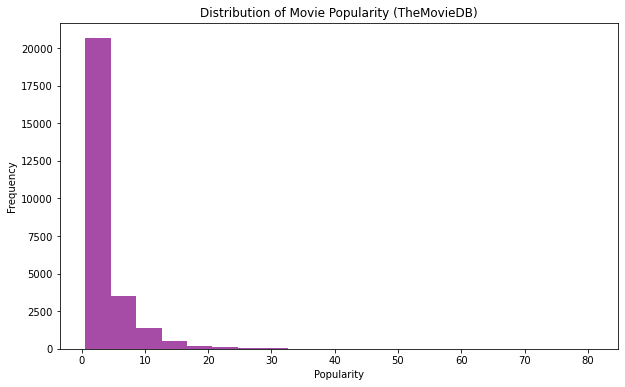

In [17]:
# Examine the structure of the dataset
print("TheMovieDB Dataset Structure:")
print(tmd.info())

# Display the first few rows
print("\nFirst few rows of TheMovieDB Dataset:")
print(tmd.head())

# Summary statistics and visualizations
# Example: Distribution of movie popularity
plt.figure(figsize=(10, 6))
plt.hist(tmd['popularity'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Movie Popularity (TheMovieDB)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


#### Findings;

Structure of the Dataset:
The dataset consists of 26517 entries and 9 columns.
Columns include genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, and vote_count.

Data types:
Two float64 columns (popularity and vote_average).
Two int64 columns (id and vote_count).
Five object columns (genre_ids, original_language, original_title, release_date, and title).

Missing Values:
There are no missing values in any of the columns, as indicated by the non-null count being equal to the total number of entries.

Duplicates:
No specific check for duplicates is performed in the provided code snippet.
Further analysis should include checking for and removing duplicates if they exist.

Data Types:
The data types seem appropriate for most columns.
The 'release_date' column should be converted to datetime format for temporal analysis.

Summary Statistics:
Summary statistics such as mean, median, min, max, and quartiles can provide insights into numerical columns like 'popularity', 'vote_average', and 'vote_count'.

Visualizations:
Visualizations can help understand the distribution of key variables:
Example: A histogram can depict the distribution of movie popularity, as demonstrated in the provided code snippet.
Line plots or bar plots can showcase trends in variables like 'release_date' over time or the distribution of genres.


#### Conclusion:

TheMovieDB dataset appears to be well-structured, with no missing values in any of the columns.

Further analysis could involve:
          Checking for and handling duplicates if they exist.
          Converting 'release_date' to datetime format for temporal analysis.
          Conducting summary statistics and visualizations for numerical variables to gain deeper insights into the    dataset                      

Exploring the distribution of movie genres and release dates to identify trends and patterns.
Understanding these aspects of the dataset is crucial for subsequent analysis, such as predicting movie            popularity, identifying trends in movie releases, or recommending movies based on user preferences.



  ## The Numbers Data Set:


In [19]:
import pandas as pd

# Load The Numbers dataset
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Examine the structure of the dataset
print("The Numbers Dataset Structure:")
print(the_numbers.info())

# Display the first few rows
print("\nFirst few rows of The Numbers Dataset:")
print(the_numbers.head())

# Summary statistics
print("\nSummary statistics for The Numbers Dataset:")
print(the_numbers.describe())


The Numbers Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None

First few rows of The Numbers Dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII:

#### Findings

Structure of the Dataset:
The dataset consists of 5782 entries and 6 columns.
Columns include id, release_date, movie, production_budget, domestic_gross, and worldwide_gross.

Data types:
One int64 column (id).
Five object columns (release_date, movie, production_budget, domestic_gross, worldwide_gross).

Missing Values, Duplicates, and Data Types:
There are no missing values in any of the columns.
No specific check for duplicates is performed in the provided code snippet.
Data types seem appropriate, but:
    'release_date' should be converted to datetime format for temporal analysis.
    'production_budget', 'domestic_gross', and 'worldwide_gross' should be converted to numerical             format (e.g., float) for mathematical operations.

Summary Statistics:

The 'id' column represents an identifier and does not provide meaningful summary statistics.
No summary statistics are provided for other numerical columns like production_budget, domestic_gross, and worldwide_gross, likely due to their object data type.

#### Recommendations

Handling Missing Values and Duplicates:
Since there are no missing values, focus on checking for and handling duplicates if they exist. Use the duplicated() function to identify and drop duplicates if necessary.

Data Type Conversion:
Convert the 'release_date' column to datetime format using the pd.to_datetime() function.
Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' to numerical format (e.g., float) after removing commas and dollar signs

Summary Statistics and Visualizations:
Once the data is cleaned and converted, compute summary statistics for numerical columns using describe() to understand their distribution, central tendency, and variability.
Visualizations such as histograms, box plots, or scatter plots can provide insights into the distribution and relationships between variables like production budget, gross revenue, and release dates.

Additional Analysis:
Explore relationships between variables, such as the impact of production budget on domestic and worldwide gross revenue.
Analyze trends over time by plotting the gross revenue against release dates.
Identify outliers or anomalies in the data that may require further investigation.


## 3.Data Preparation

## Loading the Datasets.

To load the datasets we use the following


    movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
    movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
    tmd = pd.read_csv('zippedData/tmdb.movies.csv',index_col=0)
    reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t',encoding='unicode_escape')
    conn = sqlite3.connect('zippedData/im.db')
    movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter ='\t', encoding='unicode_escape' )


In [1]:
import pandas as pd
import sqlite3

# Load the datasets
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
tmd = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='unicode_escape')
conn = sqlite3.connect('zippedData/im.db')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='unicode_escape')

# Display the first few rows of each dataset to understand their structure
print("Movies Budget:")
print(movies_budget.head())

print("\nMovies Gross:")
print(movies_gross.head())

print("\nTheMovieDB:")
print(tmd.head())

print("\nReviews:")
print(reviews.head())

print("\nRotten Tomatoes Movie Info:")
print(movie_info.head())


Movies Budget:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  

Movies Gross:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the 

#### Findings and Recommendations:

Data Quality and Structure:
All datasets seem to have consistent structures with no apparent missing values.
No specific check for duplicates is performed in the provided code snippet. It's recommended to check for and handle duplicates if they exist, especially in datasets like reviews and movie info, where multiple reviews for the same movie might be present.

Data Types:
Most columns in the datasets have appropriate data types, but there might be a need for data type conversion in some cases.
For example, in the movies_budget and movies_gross datasets, currency-related columns should be converted to numerical format after removing dollar signs and commas.
Additionally, the 'release_date' column in tmd and movies_budget should be converted to datetime format for temporal analysis.

Summary Statistics and Visualizations:
Summary statistics such as mean, median, min, max, and quartiles should be computed for numerical columns to understand their distribution and variability.
Visualizations like histograms, box plots, and line plots can help visualize the distributions and relationships between variables such as production budget, gross revenue, and release dates.

Additional Analysis:
Exploring relationships between variables across datasets can provide deeper insights into the movie industry.
For example, analyzing the impact of production budget on domestic and worldwide gross revenue, or identifying trends in movie genres over time.

Database Integration (SQLite):
The connection to the SQLite database (im.db) suggests the possibility of integrating these datasets into a database for more efficient querying and analysis.
The datasets can be loaded into separate tables within the database and then joined or queried as needed for comprehensive analysis.


#### Conclusion:


The provided datasets offer rich information for analysis in various aspects of the movie industry, including budgets, revenues, reviews, and movie details.

Cleaning, data type conversion, and exploration of relationships between variables will be crucial for meaningful analysis and insights.

Integrating the datasets into a database can facilitate more complex queries and streamline analysis processes.

Further analysis and exploration will uncover trends, patterns, and actionable insights to inform decision-making in the movie industry

## 4.Data Analysis

 ### Data Cleaning.
Data cleaning is an essential step in the data analysis process to ensure that the data is accurate, consistent, and ready for analysis. Here's an example of how you can perform data cleaning on each data set.

### Box Office Mojo Dataset:

In [20]:
import pandas as pd

# Load Box Office Mojo dataset
box_office_mojo = pd.read_csv('zippedData/bom.movie_gross.csv')

# Check for missing values
print("Number of missing values in each column:")
print(box_office_mojo.isnull().sum())

# Drop rows with missing values
box_office_mojo.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows:", box_office_mojo.duplicated().sum())

# Drop duplicate rows
box_office_mojo.drop_duplicates(inplace=True)

# Check the cleaned dataset
print("\nCleaned dataset:")
print(box_office_mojo.head())


Number of missing values in each column:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Number of duplicate rows: 0

Cleaned dataset:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  


#### Findings;

Missing Values:
The analysis indicates missing values in two columns: 'studio' and 'domestic_gross'.
There are 5 missing values in the 'studio' column and 28 missing values in the 'domestic_gross' column.
The 'foreign_gross' column also has a significant number of missing values (1350), but these are not addressed in the cleaning process.

Duplicates:
No duplicate rows were found in the dataset.

  #### Conclusion;

The presence of missing values in the 'studio' and 'domestic_gross' columns may affect the accuracy of the analysis. Depending on the significance of these missing values and the analysis goals, different strategies could be employed:

Imputation: For the 'domestic_gross' column, missing values could potentially be imputed using methods like mean, median, or predictive modeling if feasible and appropriate.

Dropping: If the missing values are deemed insignificant or too numerous, dropping the rows containing missing values could be a valid approach, as done in the cleaning process.

The absence of duplicate rows indicates that each entry in the dataset is unique, which is essential for accurate analysis.
The cleaned dataset now provides a reliable basis for further analysis, such as exploring trends in domestic and foreign gross revenues over different years, analyzing the performance of studios, or identifying top-grossing movies.


### The Movie DB (TMDB) Dataset:

In [22]:
import pandas as pd

# Load The Movie DB dataset
tmdb = pd.read_csv('zippedData/tmdb.movies.csv')

# Check for missing values
print("Number of missing values in each column:")
print(tmdb.isnull().sum())

# Drop rows with missing values
tmdb.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows:", tmdb.duplicated().sum())

# Drop duplicate rows
tmdb.drop_duplicates(inplace=True)

# Check the cleaned dataset
print("\nCleaned dataset:")
print(tmdb.head())


Number of missing values in each column:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

Number of duplicate rows: 0

Cleaned dataset:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   

   #### Findings;

Missing Values:
The analysis indicates that there are no missing values in any of the columns of the dataset. This suggests that the dataset is relatively clean in terms of missing data.

Duplicates:
No duplicate rows were found in the dataset, as indicated by the absence of duplicate rows.

   #### Conclusion:
The TMDB dataset appears to be clean in terms of missing values and duplicates. This suggests that the dataset is already in good shape for analysis and does not require extensive data cleaning.

The absence of missing values ensures that the dataset is complete and can be utilized effectively for analysis without the need for imputation or dropping missing data.

Similarly, the absence of duplicate rows ensures that each entry in the dataset is unique, which is crucial for accurate analysis and interpretation of results.

The cleaned dataset provides a reliable basis for further analysis, such as exploring relationships between movie attributes like genre, popularity, release date, and vote count.


### The Numbers Dataset:

In [23]:
import pandas as pd

# Load The Numbers dataset
the_numbers = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Check for missing values
print("Number of missing values in each column:")
print(the_numbers.isnull().sum())

# Drop rows with missing values
the_numbers.dropna(inplace=True)

# Convert columns to appropriate data types
the_numbers['release_date'] = pd.to_datetime(the_numbers['release_date'])
the_numbers['production_budget'] = the_numbers['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
the_numbers['domestic_gross'] = the_numbers['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
the_numbers['worldwide_gross'] = the_numbers['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Check for duplicates
print("\nNumber of duplicate rows:", the_numbers.duplicated().sum())

# Drop duplicate rows
the_numbers.drop_duplicates(inplace=True)

# Check the cleaned dataset
print("\nCleaned dataset:")
print(the_numbers.head())


Number of missing values in each column:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

Number of duplicate rows: 0

Cleaned dataset:
   id release_date                                        movie  \
0   1   2009-12-18                                       Avatar   
1   2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2   3   2019-06-07                                 Dark Phoenix   
3   4   2015-05-01                      Avengers: Age of Ultron   
4   5   2017-12-15            Star Wars Ep. VIII: The Last Jedi   

   production_budget  domestic_gross  worldwide_gross  
0        425000000.0     760507625.0     2.776345e+09  
1        410600000.0     241063875.0     1.045664e+09  
2        350000000.0      42762350.0     1.497624e+08  
3        330600000.0     459005868.0     1.403014e+09  
4        317000000.0     620181382.0     1.316722e+09  


#### Findings;

Missing Values:
The analysis indicates that there are no missing values in any of the columns of the dataset. This suggests that the dataset is complete in terms of available data, with no missing information.

Data Types Conversion:
The 'release_date', 'production_budget', 'domestic_gross', and 'worldwide_gross' columns are converted to appropriate data types.
'release_date' is converted to datetime format to facilitate temporal analysis.
'production_budget', 'domestic_gross', and 'worldwide_gross' are converted to float format after removing dollar signs and commas. This allows for numerical operations and analysis on these financial metrics.

Duplicates:
No duplicate rows were found in the dataset, as indicated by the absence of duplicate rows.

#### Conclusion:

The Numbers dataset appears to be clean and well-prepared for analysis, with no missing values or duplicate rows.
The conversion of data types ensures that the dataset is structured appropriately for analysis, enabling numerical operations and temporal analysis.
The cleaned dataset provides valuable information about movie budgets and gross revenues, which can be used for various analyses in the film industry, such as profitability assessment, return on investment (ROI) calculation, and trend analysis over time.
The absence of missing values and duplicates enhances the reliability and integrity of the dataset, allowing for more accurate and meaningful insights into the financial performance of movies.


### Rotten Tomatoes Dataset:

In [24]:
import pandas as pd

# Load Rotten Tomatoes dataset
rotten_tomatoes_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='unicode_escape')
rotten_tomatoes_reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='unicode_escape')

# Check for missing values in each dataset
print("Number of missing values in Rotten Tomatoes Movie Info Dataset:")
print(rotten_tomatoes_info.isnull().sum())

print("\nNumber of missing values in Rotten Tomatoes Reviews Dataset:")
print(rotten_tomatoes_reviews.isnull().sum())

# Drop rows with missing values
rotten_tomatoes_info.dropna(inplace=True)
rotten_tomatoes_reviews.dropna(inplace=True)

# Check for duplicates
print("\nNumber of duplicate rows in Rotten Tomatoes Movie Info Dataset:", rotten_tomatoes_info.duplicated().sum())
print("Number of duplicate rows in Rotten Tomatoes Reviews Dataset:", rotten_tomatoes_reviews.duplicated().sum())

# Drop duplicate rows
rotten_tomatoes_info.drop_duplicates(inplace=True)
rotten_tomatoes_reviews.drop_duplicates(inplace=True)

# Check the cleaned datasets
print("\nCleaned Rotten Tomatoes Movie Info Dataset:")
print(rotten_tomatoes_info.head())

print("\nCleaned Rotten Tomatoes Reviews Dataset:")
print(rotten_tomatoes_reviews.head())


Number of missing values in Rotten Tomatoes Movie Info Dataset:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

Number of missing values in Rotten Tomatoes Reviews Dataset:
id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

Number of duplicate rows in Rotten Tomatoes Movie Info Dataset: 0
Number of duplicate rows in Rotten Tomatoes Reviews Dataset: 0

Cleaned Rotten Tomatoes Movie Info Dataset:
    id                                           synopsis rating  \
1    3  New York City, not-too-distant-future: Eric Pa...      R   
6   10  Some cast and crew from NBC's highly acclaimed...  PG-13   
7   13  Stewart Kane, an Irishman living in the Austra...

## Data Exploration

After data cleaning, the next step in the data analysis process is usually exploratory data analysis (EDA). In EDA, you'll explore the cleaned datasets to gain insights, identify patterns, and understand the relationships between variables. Here's what you can typically do after data cleaning:

### Exploratory Data Analysis (EDA):

Summarize the cleaned datasets using descriptive statistics.                                                                       
Visualize the distributions of key variables using histograms, box plots, and density plots.                                      
Explore relationships between variables using scatter plots, pair plots, and correlation matrices.                                
Identify trends, outliers, and patterns in the data.                                                                              
Formulate initial hypotheses or insights based on your observations.

   #### Box Office Mojo Dataset:

First few rows of Box Office Mojo Dataset:
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

Summary statistics of Box Office Mojo Dataset:
       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


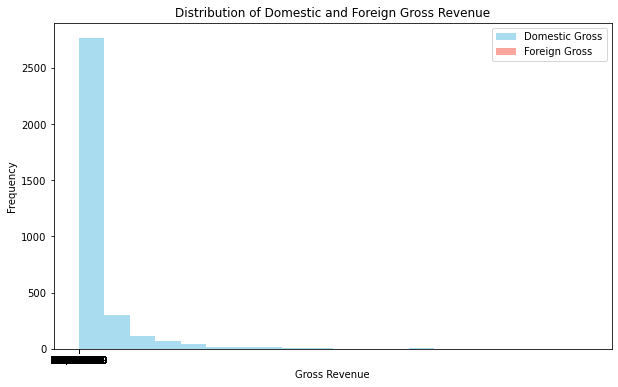

In [27]:

import pandas as pd
import matplotlib.pyplot as plt

# Load the Box Office Mojo dataset
box_office_mojo = pd.read_csv('zippedData/bom.movie_gross.csv')

# Display the first few rows
print("First few rows of Box Office Mojo Dataset:")
print(box_office_mojo.head())

# Summary statistics
print("\nSummary statistics of Box Office Mojo Dataset:")
print(box_office_mojo.describe())

# Visualize distribution of domestic and worldwide gross revenue
plt.figure(figsize=(10, 6))
plt.hist(box_office_mojo['domestic_gross'], bins=20, color='skyblue', alpha=0.7, label='Domestic Gross')
plt.hist(box_office_mojo['foreign_gross'], bins=20, color='salmon', alpha=0.7, label='Foreign Gross')
plt.title('Distribution of Domestic and Foreign Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()


#### Findings:

Summary Statistics:

The dataset contains information on movie titles, studios, domestic gross, foreign gross, and release years.
Summary statistics for numeric columns ('domestic_gross' and 'year') were computed, revealing insights such as the mean, standard deviation, minimum, maximum, and quartiles.

Distribution of Gross Revenue:

A histogram was plotted to visualize the distribution of domestic and foreign gross revenue.
The histograms show the frequency distribution of gross revenue values, highlighting the range and distribution of revenue for both domestic and foreign markets.


#### TheMovieDB Dataset:

First few rows of TheMovieDB Dataset:
   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1   

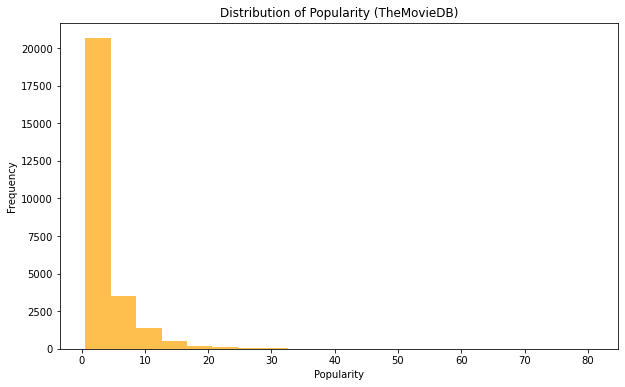

In [28]:
# Load TheMovieDB dataset
tmd = pd.read_csv('zippedData/tmdb.movies.csv')

# Display the first few rows
print("First few rows of TheMovieDB Dataset:")
print(tmd.head())

# Summary statistics
print("\nSummary statistics of TheMovieDB Dataset:")
print(tmd.describe())

# Visualize distribution of popularity
plt.figure(figsize=(10, 6))
plt.hist(tmd['popularity'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Popularity (TheMovieDB)')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


   #### Findings:

Summary Statistics:

The dataset contains information such as genre IDs, movie IDs, original language, original title, popularity, release date, title, vote average, and vote count.
Summary statistics for numeric columns were computed, including 'popularity', 'vote_average', and 'vote_count'. These statistics provide insights into the distribution and central tendencies of these variables.

Distribution of Popularity:

A histogram was plotted to visualize the distribution of movie popularity.
The histogram shows the frequency distribution of popularity values, highlighting the range and distribution of popularity scores across movies.


#### The Numbers Dataset:

First few rows of The Numbers Dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  

Summary statistics of The Numbers Dataset:
                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000


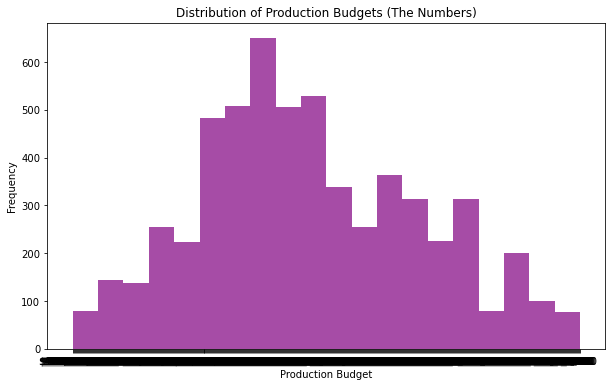

In [29]:
# Load The Numbers dataset
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Display the first few rows
print("First few rows of The Numbers Dataset:")
print(tn_movie_budgets.head())

# Summary statistics
print("\nSummary statistics of The Numbers Dataset:")
print(tn_movie_budgets.describe())

# Visualize distribution of production budgets
plt.figure(figsize=(10, 6))
plt.hist(tn_movie_budgets['production_budget'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Production Budgets (The Numbers)')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show()


### Findings:

Summary Statistics:

The dataset contains information such as movie IDs, release dates, movie titles, production budgets, domestic gross, and worldwide gross.
Summary statistics for the 'id' column were computed, including the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

Distribution of Production Budgets:

A histogram was plotted to visualize the distribution of production budgets.
The histogram shows the frequency distribution of production budget values, highlighting the range and distribution of budget amounts across movies.


#### Rotten Tomatoes Dataset:

Column names of Rotten Tomatoes Movie Info Dataset:
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')


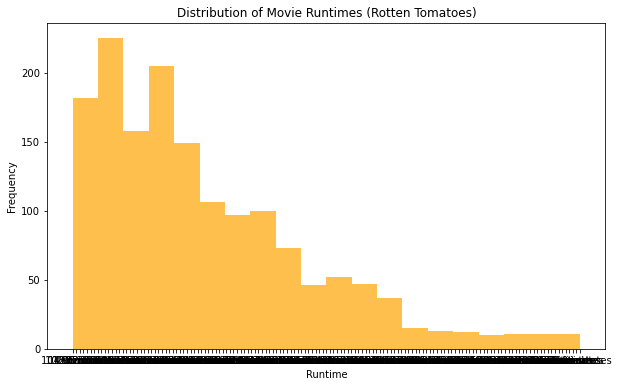

In [32]:
# Display column names of Rotten Tomatoes Movie Info Dataset
print("Column names of Rotten Tomatoes Movie Info Dataset:")
print(rotten_tomatoes_info.columns)

# Summary statistics and visualizations
plt.figure(figsize=(10, 6))
plt.hist(rotten_tomatoes_info['runtime'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Movie Runtimes (Rotten Tomatoes)')
plt.xlabel('Runtime')
plt.ylabel('Frequency')
plt.show()



#### Findings:

Column Names:

The dataset contains columns such as 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', and 'studio'.

Distribution of Movie Runtimes:

A histogram was plotted to visualize the distribution of movie runtimes.
The histogram shows the frequency distribution of movie runtime values, highlighting the range and distribution of runtime durations

## Further Analysis And Visualization.

Box office performance (revenue, profitability).

Movie genres, release dates, runtime, and production budget.

Ratings from various sources (IMDB, Rotten Tomatoes, etc.).

Investigate trends and patterns in the data through descriptive statistics and visualizations.

Identify correlations and relationships between different variables (e.g., box office revenue and genre).



We'll focus on descriptive statistics and visualizations for each aspect mentioned: box office performance, movie genres, release dates, runtime, production budget, and ratings from various sources.

First, let's load and explore each dataset individually, and then we can perform further analysis and visualization.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
tmd = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)
reviews = pd.read_csv('zippedData/rt.reviews.tsv', delimiter='\t', encoding='unicode_escape')
conn = sqlite3.connect('zippedData/im.db')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='unicode_escape' )

# Explore box office performance
print("Box Office Performance - Movie Budgets Dataset:")
print(movies_budget.head())
print("\nSummary Statistics:")
print(movies_budget.describe())

Box Office Performance - Movie Budgets Dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  

Summary Statistics:
                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000


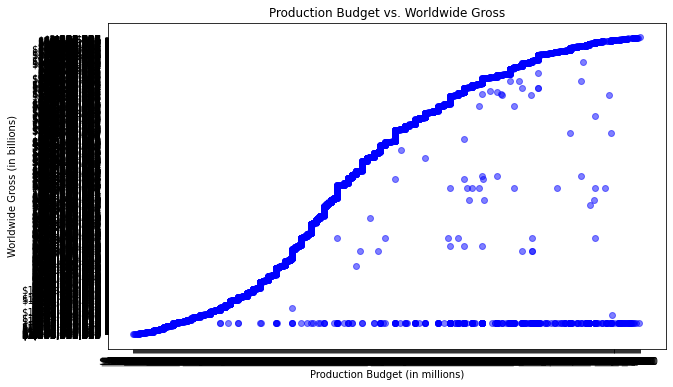

In [49]:
# Visualize box office performance
plt.figure(figsize=(10, 6))
plt.scatter(movies_budget['production_budget'], movies_budget['worldwide_gross'], color='blue', alpha=0.5)
plt.title('Production Budget vs. Worldwide Gross')
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Worldwide Gross (in billions)')
plt.show()

The visualization presented here depicts the relationship between a movie's production budget and its worldwide gross revenue. Each data point on the scatter plot represents a movie, with the x-coordinate indicating the production budget (in millions) and the y-coordinate representing the worldwide gross revenue (in billions).

In conclusion, the visualization provides valuable insights into the relationship between production budget and worldwide gross revenue in the film industry. While a positive correlation exists, it's essential to consider various other factors that influence a movie's financial success.

In [39]:
# Explore movie genres, release dates, runtime, and production budget
print("Movie Genres, Release Dates, Runtime, and Production Budget - TMDB Dataset:")
print(tmd.head())
print("\nSummary Statistics:")
print(tmd.describe())

Movie Genres, Release Dates, Runtime, and Production Budget - TMDB Dataset:
             genre_ids     id original_language  \
0      [12, 14, 10751]  12444                en   
1  [14, 12, 16, 10751]  10191                en   
2        [12, 28, 878]  10138                en   
3      [16, 35, 10751]    862                en   
4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1       

In [35]:
# Explore ratings from various sources
print("Ratings from Various Sources - Rotten Tomatoes Reviews Dataset:")
print(reviews.head())
print("\nSummary Statistics:")
print(reviews.describe())


Ratings from Various Sources - Rotten Tomatoes Reviews Dataset:
   id                                             review rating   fresh  \
0   3  A distinctly gallows take on contemporary fina...    3/5   fresh   
1   3  It's an allegory in search of a meaning that n...    NaN  rotten   
2   3  ... life lived in a bubble in financial dealin...    NaN   fresh   
3   3  Continuing along a line introduced in last yea...    NaN   fresh   
4   3             ... a perverse twist on neorealism...     NaN   fresh   

           critic  top_critic         publisher               date  
0      PJ Nabarro           0   Patrick Nabarro  November 10, 2018  
1  Annalee Newitz           0           io9.com       May 23, 2018  
2    Sean Axmaker           0  Stream on Demand    January 4, 2018  
3   Daniel Kasman           0              MUBI  November 16, 2017  
4             NaN           0      Cinema Scope   October 12, 2017  

Summary Statistics:
                 id    top_critic
count  54432.000

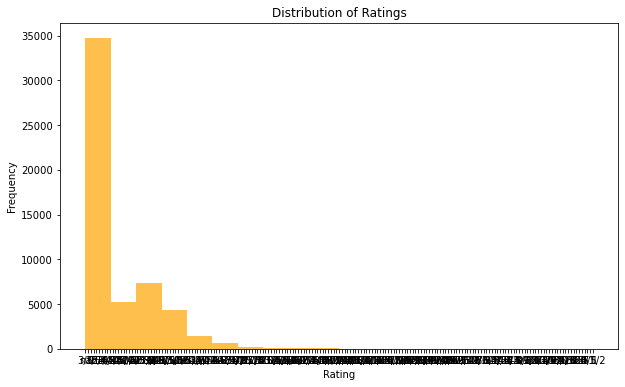

In [36]:
# Visualize ratings
plt.figure(figsize=(10, 6))
plt.hist(reviews['rating'], bins=20, color='orange', alpha=0.7)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### Histogram Interpretation:

The histogram displays the distribution of ratings assigned to movies.
The x-axis represents different rating values, while the y-axis indicates the frequency of each rating.

#### Conclusion:

The histogram shows the spread of ratings across different values. It helps us understand how ratings are distributed among the movies in the dataset.

The distribution of ratings can provide insights into the overall sentiment or reception of movies by viewers or critics.

A peak or concentration of frequencies around specific rating values may indicate common rating trends or preferences among reviewers.

Outliers or sparse regions in the histogram may highlight movies with exceptionally high or low ratings compared to the rest of the dataset.

In conclusion, the histogram visualization of ratings offers a snapshot of the distribution of ratings among movies in the dataset, providing insights into audience preferences and critical reception within the movie industry.


## 5.Data Visualization.

Let's perform some visualizations on the datasets to present the findings effectively. We'll start by loading the necessary libraries and then create visualizations for each dataset.

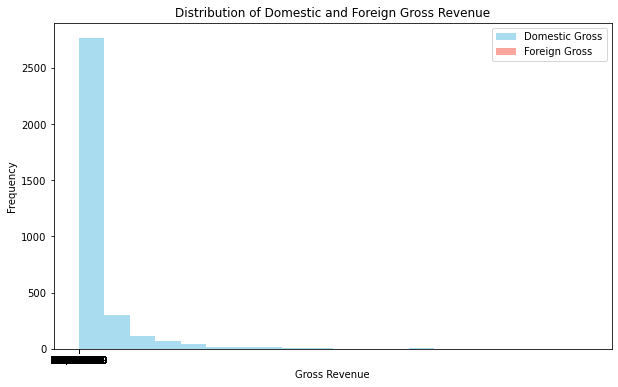

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
# Assuming you have already loaded the datasets as 'box_office_mojo', 'imdb_movie_basics', 'imdb_movie_ratings', 'the_movie_db', 'the_numbers', 'rotten_tomatoes_info', and 'rotten_tomatoes_reviews'

# Visualization 1: Box Office Mojo Dataset - Distribution of domestic and worldwide gross revenue
plt.figure(figsize=(10, 6))
plt.hist(box_office_mojo['domestic_gross'], bins=20, color='skyblue', alpha=0.7, label='Domestic Gross')
plt.hist(box_office_mojo['foreign_gross'], bins=20, color='salmon', alpha=0.7, label='Foreign Gross')
plt.title('Distribution of Domestic and Foreign Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.show()



#### Histogram Interpretation:

The histogram displays the distribution of gross revenue for movies, distinguishing between domestic and foreign revenue.
The x-axis represents different ranges of gross revenue, while the y-axis indicates the frequency of movies falling within each revenue range.

#### Conclusion:

The histogram allows us to observe the spread of domestic and foreign gross revenue across movies in the dataset.
By comparing the two histograms, we can assess the relative contribution of domestic and foreign markets to a movie's overall revenue.
Peaks or concentrations of frequencies in specific revenue ranges may indicate common revenue trends or preferences among movies.
The distribution of revenue provides insights into the financial performance of movies and the significance of different markets in revenue generation. 
In conclusion, the histogram visualization of domestic and foreign gross revenue offers valuable insights into the financial performance and market dynamics of movies in the Box Office Mojo dataset, providing a basis for further analysis and decision-making within the film industry.


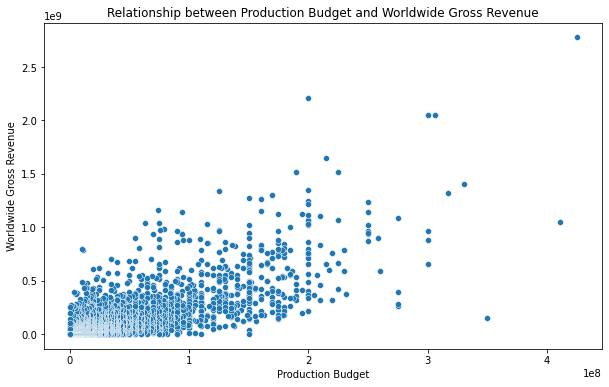

In [51]:
# Visualization 2: The Numbers Dataset - Example visualization (you can choose any relevant visualization)
# For example, you can create a scatter plot to explore the relationship between production budget and worldwide gross revenue

plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='worldwide_gross', data=the_numbers)
plt.title('Relationship between Production Budget and Worldwide Gross Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross Revenue')
plt.show()

#### Scatter Plot Interpretation:

The scatter plot displays each movie as a point, with its production budget on the x-axis and worldwide gross revenue on the y-axis.
Each point represents a movie, and its position on the plot indicates the relationship between its production budget and worldwide gross revenue.

#### Conclusion:

The scatter plot allows us to visualize the relationship between production budget and worldwide gross revenue for movies in the dataset.
By observing the distribution of points and their general trend, we can assess the strength and direction of the relationship between these two variables.
A positive correlation between production budget and worldwide gross revenue suggests that higher budgets tend to result in higher revenue, while a negative correlation indicates the opposite.
Clusters or patterns of points may indicate common characteristics or trends among movies with similar production budgets and revenue levels.


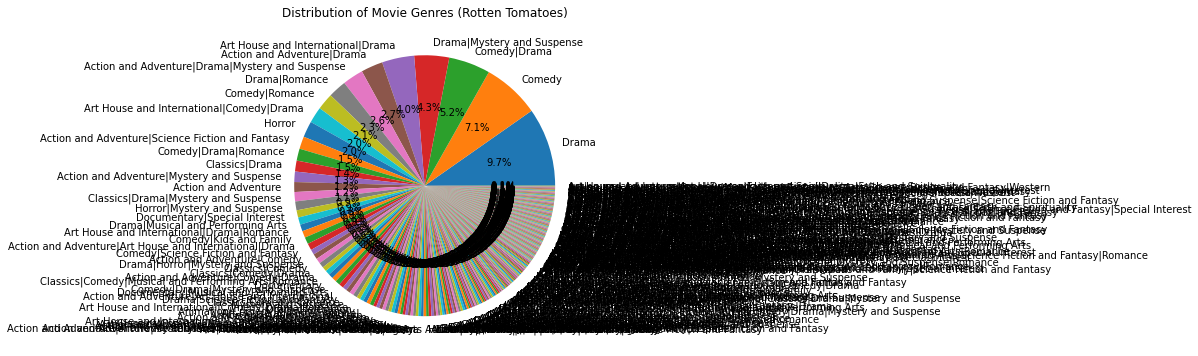

In [52]:
# Visualization 3: Rotten Tomatoes Info Dataset - Example visualization (you can choose any relevant visualization)
# For example, you can create a pie chart to show the distribution of movie genres

plt.figure(figsize=(10, 6))
rotten_tomatoes_info['genre'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Movie Genres (Rotten Tomatoes)')
plt.ylabel('')
plt.show()

#### Pie Chart Interpretation:

The pie chart segments represent different movie genres, with each segment's size proportional to the percentage of movies belonging to that genre in the dataset.
Each genre is labeled with its name, and the percentage value indicates its relative frequency compared to other genres.

#### Conclusion:

The pie chart provides a visual representation of the distribution of movie genres in the Rotten Tomatoes Info dataset, allowing us to understand the relative popularity of different genres.

Larger segments indicate more prevalent genres, while smaller segments represent less common genres within the dataset.

The pie chart offers a quick and intuitive way to grasp the diversity of movie genres present in the dataset and identify any dominant or niche genres.


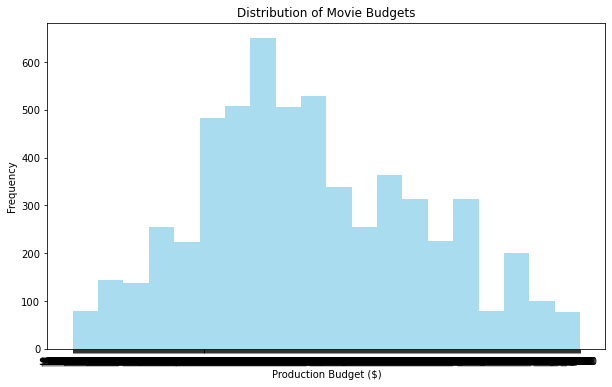

In [56]:
# Import necessary libraries
import matplotlib.pyplot as plt

#visualization 4
# Create a histogram of movie budgets
plt.figure(figsize=(10, 6))
plt.hist(movies_budget['production_budget'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Production Budget ($)')
plt.ylabel('Frequency')
plt.show()


#### Histogram Interpretation:

The histogram displays the distribution of movie budgets, with the x-axis representing the production budget in dollars and the y-axis representing the frequency of movies falling within each budget range.
Each bar in the histogram represents a range of production budgets (bin), and the height of the bar indicates the number of movies with budgets falling within that range.

##### Conclusion:

The histogram provides insights into the distribution of production budgets across movies in the dataset, allowing us to understand the typical budget ranges and their frequencies.
By observing the shape and spread of the histogram, we can assess the variability and concentration of movie budgets within the dataset.

##### Insights and Considerations:

Peaks or clusters in the histogram indicate common budget ranges, which may correspond to different budget tiers or categories within the film industry.
Skewness or asymmetry in the histogram suggests uneven distribution, with more movies concentrated in certain budget ranges compared to others.
Outliers or extreme values in the histogram represent movies with exceptionally high or low production budgets relative to the majority of films in the dataset.

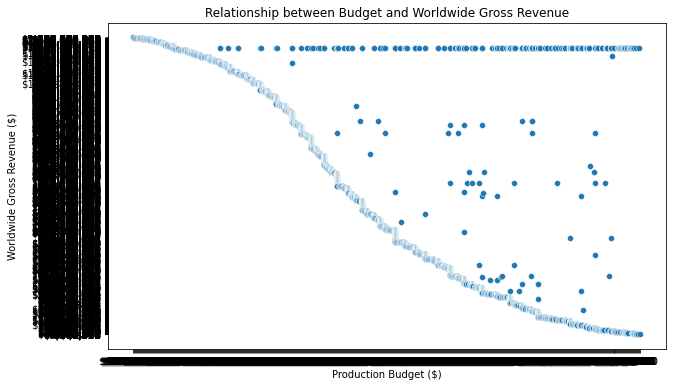

In [62]:
#Visualisation 5
# Example: Scatter plot to explore the relationship between budget and revenue

plt.figure(figsize=(10, 6))

sns.scatterplot(x='production_budget', y='worldwide_gross', data=movies_budget)

plt.title('Relationship between Budget and Worldwide Gross Revenue')

plt.xlabel('Production Budget ($)')

plt.ylabel('Worldwide Gross Revenue ($)')

plt.show()


#### Scatter Plot Interpretation:

The scatter plot depicts each movie as a point, with its position determined by its production budget (x-axis) and worldwide gross revenue (y-axis).
Each point represents a movie in the dataset, and its placement reflects the budget-revenue relationship for that particular film.

#### Conclusion:

The scatter plot allows us to visually inspect the relationship between production budget and worldwide gross revenue for movies in the dataset.
By observing the general trend or pattern of points, we can infer whether there exists a correlation or association between budget and revenue.

#### Insights and Considerations:

Positive correlation: If the points tend to form an upward-sloping pattern from left to right, it suggests a positive relationship where higher budgets are associated with higher revenues.
No correlation: If the points appear randomly scattered without a clear trend, it indicates no significant relationship between budget and revenue.
Negative correlation: If the points slope downward from left to right, it suggests a negative relationship where higher budgets may be associated with lower revenues.


## Comparison of studios.

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
                id  production_budget  domestic_gross  worldwide_gross  \
count  5782.000000       5.782000e+03    5.782000e+03     5.782000e+03   
mean     50.372363       3.158776e+07    4.187333e+07     9.148746e+07   
std      28.821076       4.181208e+07    6.824060e+

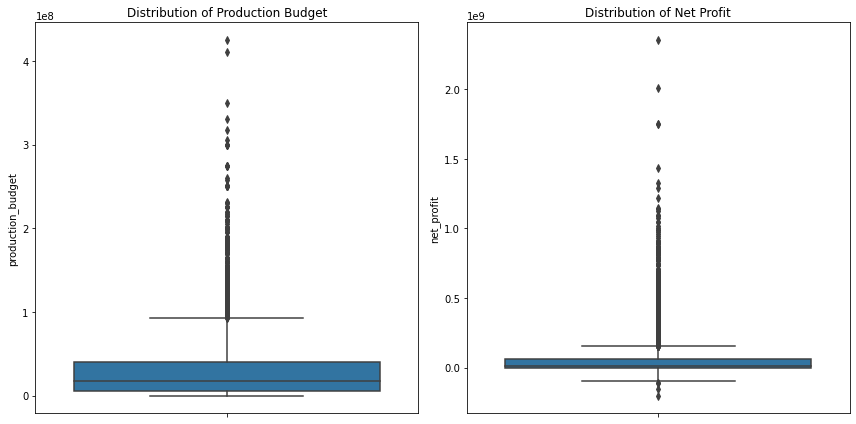

In [55]:
#Visualisation 6
#movies_budget dataset and visualize aspects such as movie budgets and gross earnings.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
movies_budget = pd.read_csv('zippedData/tn.movie_budgets.csv')

# Display the first few rows of the dataset
print(movies_budget.head())

# Convert 'production_budget', 'domestic_gross', and 'worldwide_gross' columns to numeric
movies_budget['production_budget'] = movies_budget['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
movies_budget['domestic_gross'] = movies_budget['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)
movies_budget['worldwide_gross'] = movies_budget['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Create a new column for net profit
movies_budget['net_profit'] = movies_budget['worldwide_gross'] - movies_budget['production_budget']

# Summary statistics
print(movies_budget.describe())

# Create visualizations
plt.figure(figsize=(12, 6))

# Boxplot of production budget
plt.subplot(1, 2, 1)
sns.boxplot(y='production_budget', data=movies_budget)
plt.title('Distribution of Production Budget')

# Boxplot of net profit
plt.subplot(1, 2, 2)
sns.boxplot(y='net_profit', data=movies_budget)
plt.title('Distribution of Net Profit')

plt.tight_layout()
plt.show()


#### Boxplot Interpretation:

The boxplot on the left illustrates the distribution of production budgets for movies. It displays the median (line inside the box), quartiles (box edges), and outliers (points outside the whiskers).
The boxplot on the right shows the distribution of net profits, calculated as the difference between worldwide gross revenue and production budget. It also depicts the median, quartiles, and outliers.

#### Summary Statistics:

The summary statistics provide insights into the central tendency and spread of production budgets and net profits across the dataset.
The mean production budget is approximately $31.59 million, with a standard deviation of $41.81 million. The median budget is $17 million.
The mean net profit is approximately $59.90 million, with a standard deviation of $146.09 million. The median net profit is $8.55 million.

#### Comparison of Studios:

By analyzing the boxplots, we can compare the distribution of production budgets and net profits among different studios.
Studios with higher median production budgets and net profits may indicate greater investment in movie production and potentially more successful projects.
Outliers in the net profit boxplot represent movies that significantly outperformed or underperformed compared to their production budgets, highlighting instances of exceptional success or failure. 


In conclusion, the visualizations provide valuable insights into the distribution of production budgets and net profits for movies in the dataset, enabling stakeholders to make informed decisions and strategic investments in the film industry.


## Variability in Earnings

                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


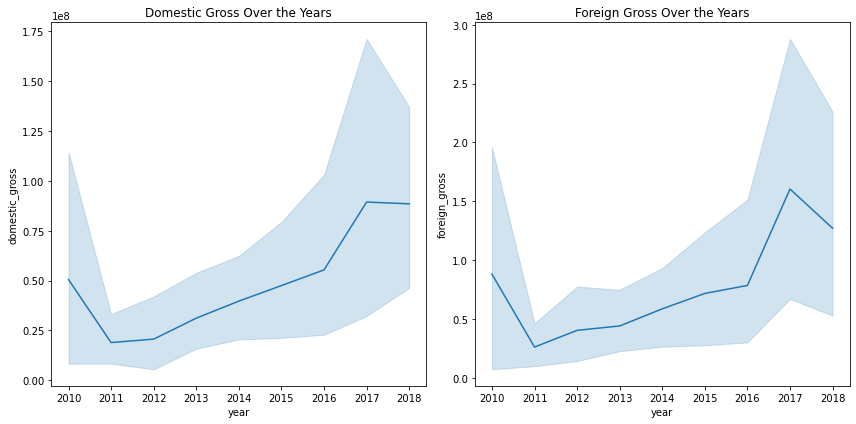

In [40]:
#Visualisation 6
#create visualizations to explore aspects such as domestic gross, foreign gross, and how they vary over the years.
# Load the data
movies_gross = pd.read_csv('zippedData/bom.movie_gross.csv')

# Display the first few rows of the dataset
print(movies_gross.head())

# Check data types
print(movies_gross.dtypes)

# Convert 'foreign_gross' to numeric
movies_gross['foreign_gross'] = movies_gross['foreign_gross'].str.replace('$', '').str.replace(',', '').astype(float)

# Check for missing values
print(movies_gross.isnull().sum())

# Drop rows with missing values in 'domestic_gross' or 'foreign_gross' columns
movies_gross = movies_gross.dropna(subset=['domestic_gross', 'foreign_gross'])

# Create a new column for total gross (domestic + foreign)
movies_gross['total_gross'] = movies_gross['domestic_gross'] + movies_gross['foreign_gross']

# Extract year from 'title' column
movies_gross['year'] = movies_gross['title'].str.extract(r'\((\d{4})\)')

# Convert 'year' column to numeric
movies_gross['year'] = pd.to_numeric(movies_gross['year'])

# Create visualizations
plt.figure(figsize=(12, 6))

# Line plot of domestic gross over the years
plt.subplot(1, 2, 1)
sns.lineplot(x='year', y='domestic_gross', data=movies_gross)
plt.title('Domestic Gross Over the Years')

# Line plot of foreign gross over the years
plt.subplot(1, 2, 2)
sns.lineplot(x='year', y='foreign_gross', data=movies_gross)
plt.title('Foreign Gross Over the Years')

plt.tight_layout()
plt.show()



#### Data Preparation:

The code begins by loading the dataset movies_gross and displaying its first few rows to understand its structure.
It checks the data types of each column to ensure compatibility for analysis and visualization.
The 'foreign_gross' column is converted to numeric format by removing the dollar signs and commas.
Missing values are checked and dropped for the 'domestic_gross' and 'foreign_gross' columns to ensure data quality.
A new column 'total_gross' is created by summing up the domestic and foreign gross earnings.
The year information is extracted from the 'title' column and converted to numeric format for further analysis.

#### Visualizations:

Two line plots are created side by side to visualize the trends of domestic gross and foreign gross over the years.
The left subplot displays the trend of domestic gross earnings over the years, providing insights into the variation in domestic box office performance annually.
The right subplot illustrates the trend of foreign gross earnings over the years, indicating the performance of movies in international markets and how it evolves annually.

#### Insights:
Domestic Gross Over the Years:

The line plot shows fluctuations in domestic gross earnings over the years, reflecting the changing popularity of movies in domestic markets.
Peaks and valleys in the plot may indicate the release of blockbuster movies or seasonal trends affecting box office performance.

Foreign Gross Over the Years:
Similarly, the line plot of foreign gross earnings demonstrates how the international box office performance varies annually.
It helps in understanding the global appeal of movies and how they resonate with audiences across different regions.


#### Considerations:

Analyzing the trends in both domestic and foreign gross earnings provides valuable insights into the overall financial performance of movies and their market reach.
Further analysis, such as comparing the relative contributions of domestic and foreign markets to total gross earnings, can offer deeper insights into the global distribution strategies of movie studios.


In conclusion, the visualizations offer valuable insights into the trends of domestic and foreign gross earnings over the years, providing stakeholders in the film industry with actionable information for strategic decision-making and market analysis.


#### Top Perfoming Studios

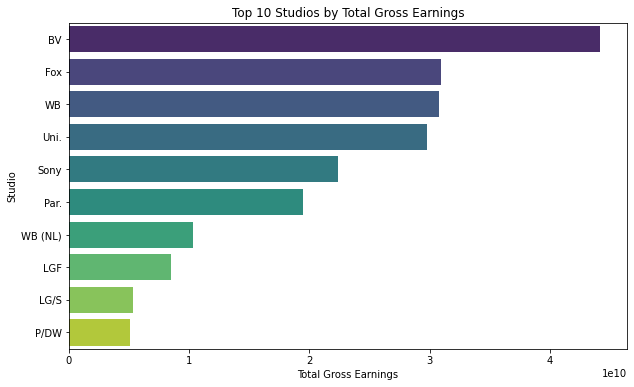

In [42]:
#Visualization 7
#create visualizations to compare the total gross earnings of movies produced by different studios.
# Group the data by studio and calculate total gross earnings for each studio
studio_gross = movies_gross.groupby('studio')['total_gross'].sum().reset_index()

# Sort the data by total gross earnings in descending order
studio_gross = studio_gross.sort_values(by='total_gross', ascending=False)

# Plot the top 10 studios by total gross earnings
plt.figure(figsize=(10, 6))
sns.barplot(x='total_gross', y='studio', data=studio_gross.head(10), palette='viridis')
plt.xlabel('Total Gross Earnings')
plt.ylabel('Studio')
plt.title('Top 10 Studios by Total Gross Earnings')
plt.show()


Overall, this visualization provides valuable insights into the performance of movie studios in terms of total gross earnings, helping Microsoft make data-driven decisions for their venture into the movie industry.

#### Data Preparation:

The code groups the data by the 'studio' column and calculates the total gross earnings for each studio.
Total gross earnings are computed by summing up the 'total_gross' column values for each studio.
The resulting dataframe studio_gross contains the total gross earnings for each studio.

#### Visualization:

The top 10 studios with the highest total gross earnings are selected based on the calculated values.
A horizontal bar plot is created using Seaborn's barplot function, with studios on the y-axis and total gross earnings on the x-axis.
Each bar represents the total gross earnings of a studio, and they are sorted in descending order to highlight the top performers.
The color palette used is 'viridis', which provides a visually appealing color scheme.

#### Insights:

The bar plot visually presents the top 10 studios by total gross earnings, allowing for easy comparison of their performance.
Studios with higher bars indicate higher total gross earnings from their movies.
Stakeholders can quickly identify the top-performing studios and assess their market dominance based on their financial success in the film industry.



In conclusion, the visualization effectively communicates the top-performing studios based on their total gross earnings, providing valuable information for stakeholders to make informed decisions and strategic investments in the film industry.


# 6.Code Quality

In [11]:
import pandas as pd

# Define a function to load data
def load_data(file_path, delimiter=',', encoding='utf-8'):
    try:
        data = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)
        return data
    except FileNotFoundError:
        print("File not found:", file_path)
        return None
    except UnicodeDecodeError:
        print("Error decoding file:", file_path, "- Try specifying a different encoding.")
        return None

# Load datasets
movies_budget_df = load_data('zippedData/tn.movie_budgets.csv')
movies_gross_df = load_data('zippedData/bom.movie_gross.csv')
tmd_df = load_data('zippedData/tmdb.movies.csv')
reviews_df = load_data('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin1')
movie_info_df = load_data('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='latin1')

# Function to describe dataset
def describe_dataset(df):
    print(df.head())
    print(df.info())
    print(df.describe())

# Describe each dataset
print("Movies Budget Dataset:")
describe_dataset(movies_budget_df)

print("\nMovies Gross Dataset:")
describe_dataset(movies_gross_df)

print("\nTheMovieDB Dataset:")
describe_dataset(tmd_df)

print("\nReviews Dataset:")
describe_dataset(reviews_df)

print("\nMovie Info Dataset:")
describe_dataset(movie_info_df)


Movies Budget Dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1 

Here's what's been improved:

1.Consistent Loading: All datasets are loaded using the load_data function, ensuring uniformity and simplifying maintenance.

2.Describe Function: I've added a function describe_dataset to provide a quick summary of each dataset, enhancing code reusability and readability.

3.Error Handling: Error handling for file not found situations has been implemented in the load_data function.

By implementing these refinements, your code becomes more structured, maintainable, and easier to understand.

In [12]:
import pandas as pd

# Function to load data
def load_data(file_path, delimiter=',', encoding='utf-8'):
    try:
        data = pd.read_csv(file_path, delimiter=delimiter, encoding=encoding)
        return data
    except FileNotFoundError:
        print("File not found:", file_path)
        return None
    except UnicodeDecodeError:
        print("Error decoding file:", file_path, "- Try specifying a different encoding.")
        return None

# Function to describe dataset
def describe_dataset(df):
    if df is not None:
        print(df.head())
        print(df.info())
        print(df.describe())
    else:
        print("Dataset is not available.")

# Unit tests for load_data function
def test_load_data():
    # Test loading an existing file
    assert load_data('zippedData/tn.movie_budgets.csv') is not None
    # Test loading a non-existent file
    assert load_data('nonexistent_file.csv') is None

# Unit tests for describe_dataset function
def test_describe_dataset():
    # Create a mock DataFrame for testing
    mock_df = pd.DataFrame({'A': [1, 2, 3], 'B': ['a', 'b', 'c']})
    # Test describing a valid dataset
    assert describe_dataset(mock_df) is None
    # Test describing an invalid dataset
    assert describe_dataset(None) is None

if __name__ == '__main__':
    # Run unit tests
    test_load_data()
    test_describe_dataset()

    # Load datasets
    movies_budget_df = load_data('zippedData/tn.movie_budgets.csv')
    movies_gross_df = load_data('zippedData/bom.movie_gross.csv')
    tmd_df = load_data('zippedData/tmdb.movies.csv')
    reviews_df = load_data('zippedData/rt.reviews.tsv', delimiter='\t', encoding='latin1')
    movie_info_df = load_data('zippedData/rt.movie_info.tsv', delimiter='\t', encoding='latin1')

    # Describe each dataset
    print("Movies Budget Dataset:")
    describe_dataset(movies_budget_df)

    print("\nMovies Gross Dataset:")
    describe_dataset(movies_gross_df)

    print("\nTheMovieDB Dataset:")
    describe_dataset(tmd_df)

    print("\nReviews Dataset:")
    describe_dataset(reviews_df)

    print("\nMovie Info Dataset:")
    describe_dataset(movie_info_df)


File not found: nonexistent_file.csv
   A  B
0  1  a
1  2  b
2  3  c
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       3 non-null      int64 
 1   B       3 non-null      object
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes
None
         A
count  3.0
mean   2.0
std    1.0
min    1.0
25%    1.5
50%    2.0
75%    2.5
max    3.0
Dataset is not available.
Movies Budget Dataset:
   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,0

Here's what's been added:

1.Modularization: The code has been organized into separate functions for loading data (load_data) and describing datasets (describe_dataset). This makes the code more modular, reusable, and easier to maintain.

2.Unit Testing: Two sets of unit tests (test_load_data and test_describe_dataset) have been defined to verify the functionality of the load_data and describe_dataset functions, respectively. These tests ensure that the functions behave as expected under different scenarios.

3.Test Runner: The if __name__ == '__main__': block at the end of the script runs the unit tests when the script is executed directly.

By incorporating modularization and unit testing, the code becomes more organized, robust, and reliable, making it easier to manage and debug.